In [1]:
pip install pybamm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 KB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.8/157.8 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.1 MB/s eta 0:00:00


In [2]:
import pybamm
import matplotlib.pyplot as plt

##Single Particle Model

In [3]:
model1 = pybamm.lithium_ion.SPM()

In [4]:
param1 = model1.default_parameter_values

"""
Capacity can only be changed by parameters like electrode width and height. 
According to https://github.com/pybamm-team/PyBaMM/discussions/1635, changing nominal cell capacity cannot effectively change the capacity in solving the model later.
But below, the nominal cell capacity is still changed for reference.
"""
# Electrode width [m], by default 0.207
#param1['Electrode width [m]'] = 0.207 / 0.680616 * 3.9
# Nominal cell capacity [A.h], by default 0.680616
#param1['Nominal cell capacity [A.h]'] = 0.680616 / 0.680616 * 3.9
# Number of cells connected in series to make a battery, by default 1
# 1 / 0.680616 * 350 ~= 515
#param1['Number of cells connected in series to make a battery'] = 515
# Number of electrodes connected in parallel to make a cell, by default 1
# 1 / 0.680616 * 350 ~= 515
#param1['Number of electrodes connected in parallel to make a cell'] = 515


"""
Set the voltage cut-off limits.
To adapt to model 3's upper bound of 300 volts, and lower bound of 240 volts (searched on ChatGPT, official source needed)
"""
# Lower voltage cut-off [V], by default 3.105
#param1['Lower voltage cut-off [V]'] = 3.105
# Upper voltage cut-off [V], by default 4.1
#param1['Upper voltage cut-off [V]'] = 4.1


"""
Current is an input for each time step
"""
# Current function [A], by default 0.680616
#param1['Current function [A]'] = 24

#print(param1)

'\nCurrent is an input for each time step\n'

In [5]:
param1.search("electrode")

Electrode height [m]	0.137
Electrode width [m]	0.207
Initial concentration in negative electrode [mol.m-3]	19986.609595075
Initial concentration in positive electrode [mol.m-3]	30730.7554385565
Maximum concentration in negative electrode [mol.m-3]	24983.2619938437
Maximum concentration in positive electrode [mol.m-3]	51217.9257309275
Negative electrode Bruggeman coefficient (electrode)	1.5
Negative electrode Bruggeman coefficient (electrolyte)	1.5
Negative electrode OCP [V]	<function graphite_mcmb2528_ocp_Dualfoil1998 at 0x7f6352e5ca60>
Negative electrode OCP entropic change [V.K-1]	<function graphite_entropic_change_Moura2016 at 0x7f6352e5c8b0>
Negative electrode active material volume fraction	0.6
Negative electrode charge transfer coefficient	0.5
Negative electrode conductivity [S.m-1]	100.0
Negative electrode density [kg.m-3]	1657.0
Negative electrode diffusivity [m2.s-1]	<function graphite_mcmb2528_diffusivity_Dualfoil1998 at 0x7f6352e5c9d0>
Negative electrode double-layer capacit

In [6]:
print(len(dict(param1)))

110


In [7]:
sim1 = pybamm.Simulation(model1, parameter_values=param1)

# https://pybamm.readthedocs.io/en/v21.9/source/simulation.html
# 100 points within the interval [t0, tf]
sim1.solve([0, 21600])

CasADi - 2023-04-05 09:14:36 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated. Set the time grid by proving additional argument to the 'integrator' call instead.") [.../casadi/core/integrator.cpp:495]
CasADi - 2023-04-05 09:14:36 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated. Set the time grid by proving additional argument to the 'integrator' call instead.") [.../casadi/core/integrator.cpp:495]


interactive(children=(FloatSlider(value=0.0, description='t', max=1.0063591527533544, step=0.01006359152753354…

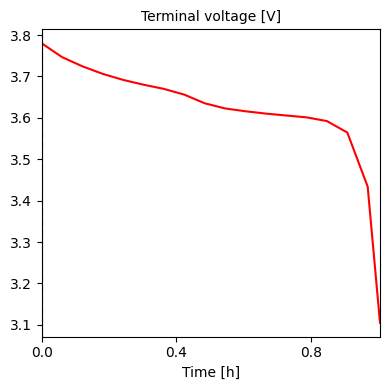

In [8]:
sim1.plot(["Terminal voltage [V]"])

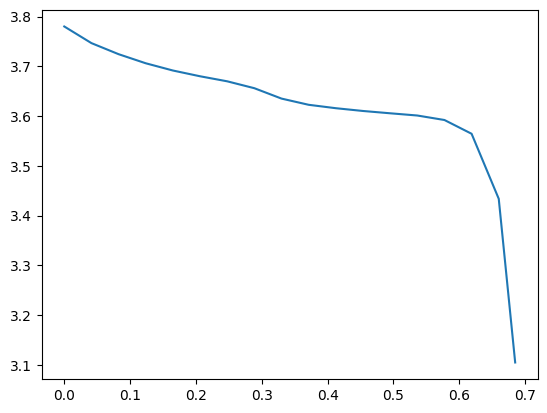

In [9]:
fig, ax = plt.subplots()
solution = sim1.solution

dcap = solution["Discharge capacity [A.h]"].data
V = solution['Terminal voltage [V]'].data
ax.plot(dcap, V)

plt.show()

##Add experiment description

In [10]:
experiment = pybamm.Experiment(
    [
        "Charge at C/5 until 4.1 V",
        "Discharge at C/1 until 3.105 V"
    ] * 1
)

In [11]:
sim = pybamm.Simulation(model1, experiment=experiment, parameter_values=param1)
sim.solve()

CasADi - 2023-04-05 09:14:38 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated. Set the time grid by proving additional argument to the 'integrator' call instead.") [.../casadi/core/integrator.cpp:495]
CasADi - 2023-04-05 09:14:38 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated. Set the time grid by proving additional argument to the 'integrator' call instead.") [.../casadi/core/integrator.cpp:495]
CasADi - 2023-04-05 09:14:39 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated. Set the time grid by proving additional argument to the 'integrator' call instead.") [.../casadi/core/integrator.cpp:495]
CasADi - 2023-04-05 09:14:39 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated. Set the time grid by proving additional argument to the 'integrator' call instead.") [.../casadi/core/integrator.cpp:495]
CasADi - 2023-04-05 09:14:39 WARNING("The options 't0', 'tf', 'grid' and 'output_t0'

interactive(children=(FloatSlider(value=0.0, description='t', max=2.34235621215565, step=0.0234235621215565), …

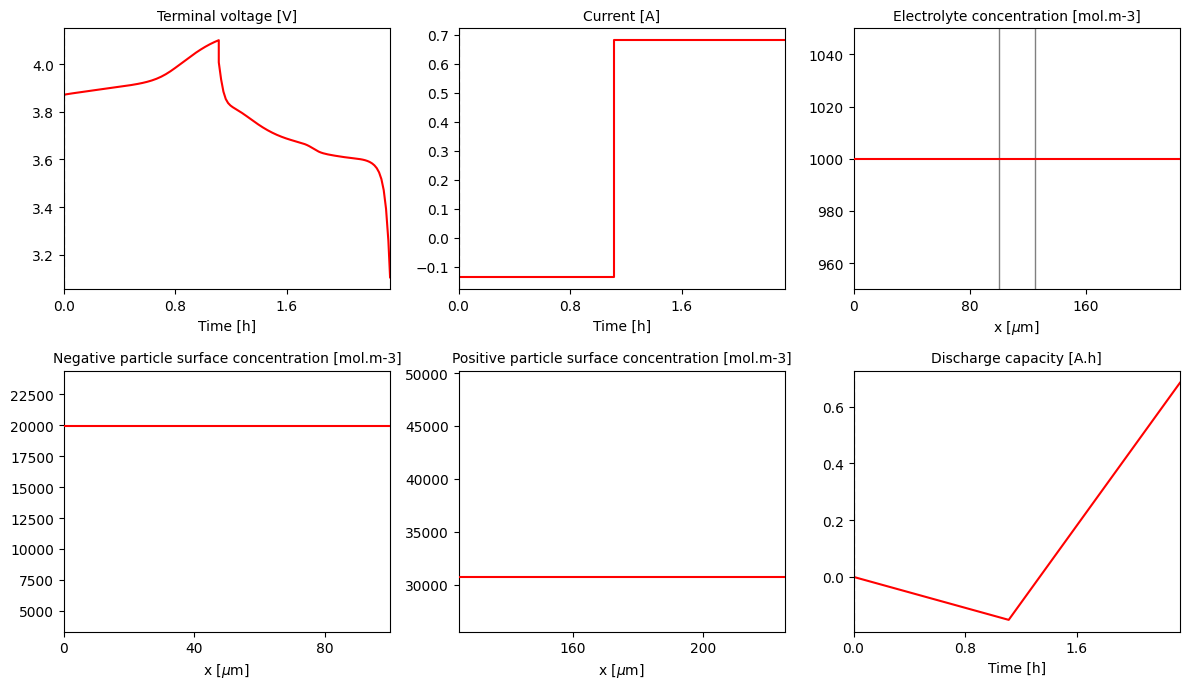

In [12]:
output_variables = [
    "Terminal voltage [V]",
    "Current [A]",
    "Electrolyte concentration [mol.m-3]",
    "Negative particle surface concentration [mol.m-3]",
    "Positive particle surface concentration [mol.m-3]",
    "Discharge capacity [A.h]"
]
sim.plot(output_variables)

In [13]:
model1.variables.search("voltage")

Battery open-circuit voltage [V]
Battery voltage [V]
Bulk open-circuit voltage [V]
Change in open-circuit voltage [V]
Local voltage [V]
Surface open-circuit voltage [V]
Terminal voltage [V]
Voltage [V]


In [14]:
model1.variables.search("capacity")

Discharge capacity [A.h]
Loss of capacity to SEI [A.h]
Loss of capacity to SEI on cracks [A.h]
Loss of capacity to lithium plating [A.h]
Negative electrode capacity [A.h]
Positive electrode capacity [A.h]
Throughput capacity [A.h]
Total capacity lost to side reactions [A.h]
Total lithium capacity [A.h]
Total lithium capacity in particles [A.h]


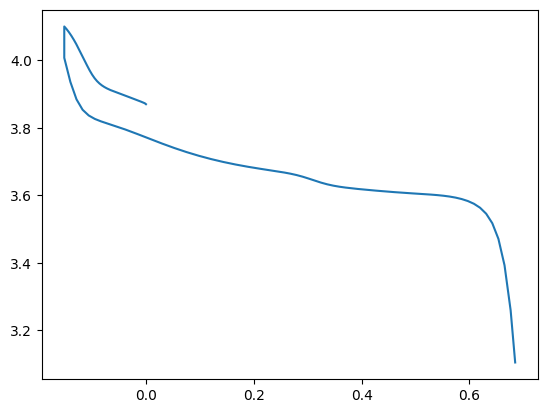

In [15]:
fig, ax = plt.subplots()
solution = sim.solution

dcap = solution["Discharge capacity [A.h]"].data
V = solution['Terminal voltage [V]'].data
ax.plot(dcap, V)

plt.show()

In [16]:
max(dcap)

0.6849444405657497

##Add experiment 2 description

In [17]:
experiment = pybamm.Experiment(
    [
        "Charge at C/5 until 4.1 V",
        "Discharge at C/1 until 3.5 V",
        "Rest for 10 minutes",
        "Discharge at C/5 until 3.1 V",
        "Charge at C/1 until 3.5 V"
    ] * 2
)

In [18]:
sim = pybamm.Simulation(model1, experiment=experiment, parameter_values=param1)
sim.solve()

CasADi - 2023-04-05 09:14:45 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated. Set the time grid by proving additional argument to the 'integrator' call instead.") [.../casadi/core/integrator.cpp:495]
CasADi - 2023-04-05 09:14:45 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated. Set the time grid by proving additional argument to the 'integrator' call instead.") [.../casadi/core/integrator.cpp:495]
CasADi - 2023-04-05 09:14:49 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated. Set the time grid by proving additional argument to the 'integrator' call instead.") [.../casadi/core/integrator.cpp:495]
CasADi - 2023-04-05 09:14:49 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated. Set the time grid by proving additional argument to the 'integrator' call instead.") [.../casadi/core/integrator.cpp:495]
CasADi - 2023-04-05 09:14:49 WARNING("The options 't0', 'tf', 'grid' and 'output_t0'

interactive(children=(FloatSlider(value=0.0, description='t', max=10.778717017189706, step=0.10778717017189705…

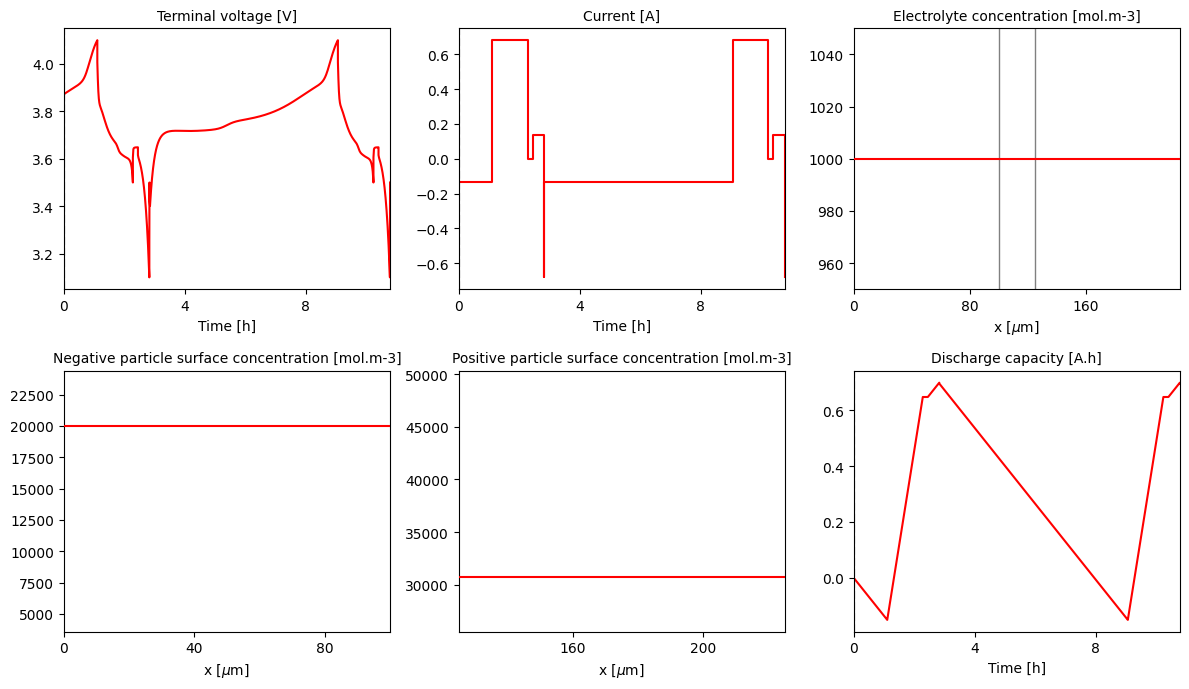

In [19]:
output_variables = [
    "Terminal voltage [V]",
    "Current [A]",
    "Electrolyte concentration [mol.m-3]",
    "Negative particle surface concentration [mol.m-3]",
    "Positive particle surface concentration [mol.m-3]",
    "Discharge capacity [A.h]"
]
sim.plot(output_variables)

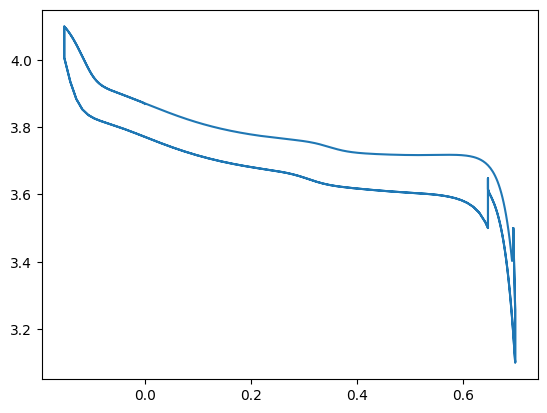

In [20]:
fig, ax = plt.subplots()
solution = sim.solution

dcap = solution["Discharge capacity [A.h]"].data
V = solution['Terminal voltage [V]'].data
ax.plot(dcap, V)

plt.show()

In [21]:
max(dcap) - min(dcap)

0.8503052634306889

In [22]:
max(dcap)

0.6987551501712128

In [23]:
V[-1]

3.4999939700120204

##Add experiment 3 description

In [24]:
experiment = pybamm.Experiment(
    [
        "Discharge at 0.25 A until 3.1 V"
    ] * 1
)

In [25]:
sim = pybamm.Simulation(model1, experiment=experiment, parameter_values=param1)
sim.solve()

CasADi - 2023-04-05 09:15:05 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated. Set the time grid by proving additional argument to the 'integrator' call instead.") [.../casadi/core/integrator.cpp:495]
CasADi - 2023-04-05 09:15:05 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated. Set the time grid by proving additional argument to the 'integrator' call instead.") [.../casadi/core/integrator.cpp:495]
CasADi - 2023-04-05 09:15:05 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated. Set the time grid by proving additional argument to the 'integrator' call instead.") [.../casadi/core/integrator.cpp:495]
CasADi - 2023-04-05 09:15:05 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated. Set the time grid by proving additional argument to the 'integrator' call instead.") [.../casadi/core/integrator.cpp:495]
CasADi - 2023-04-05 09:15:05 WARNING("The options 't0', 'tf', 'grid' and 'output_t0'

interactive(children=(FloatSlider(value=0.0, description='t', max=2.7824323029654967, step=0.02782432302965496…

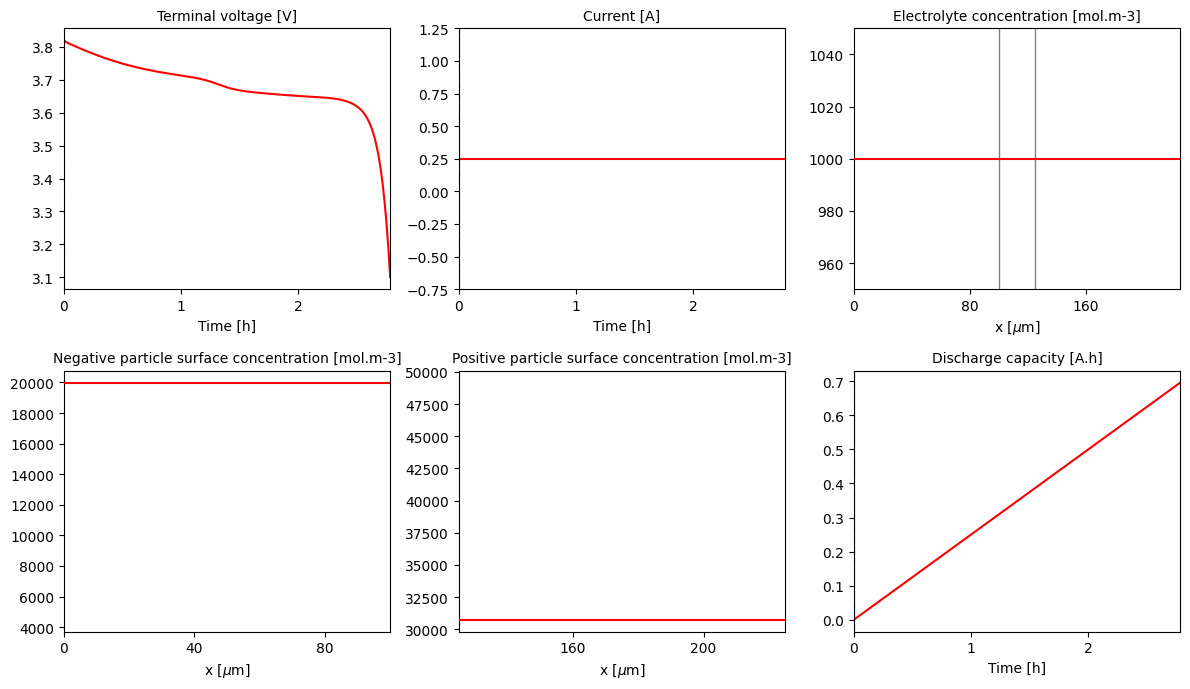

In [26]:
output_variables = [
    "Terminal voltage [V]",
    "Current [A]",
    "Electrolyte concentration [mol.m-3]",
    "Negative particle surface concentration [mol.m-3]",
    "Positive particle surface concentration [mol.m-3]",
    "Discharge capacity [A.h]"
]
sim.plot(output_variables)

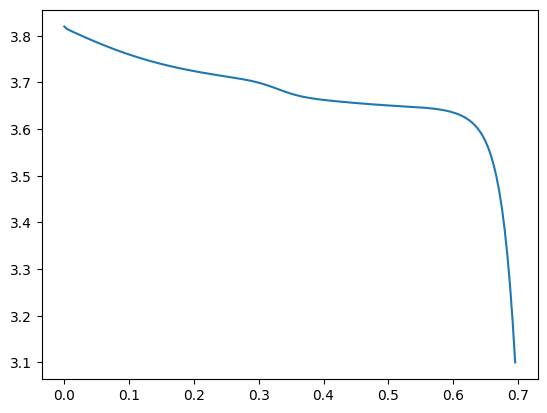

In [27]:
fig, ax = plt.subplots()
solution = sim.solution

dcap = solution["Discharge capacity [A.h]"].data
V = solution['Terminal voltage [V]'].data
ax.plot(dcap, V)

plt.show()